In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA

In [16]:
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [17]:
X = df[['area', 'stories', 'furnishingstatus']].copy()
y = df['price']

scaler = StandardScaler()
encoder = OrdinalEncoder()

numerical_columns = ['area', 'stories']
categorical_columns = ['furnishingstatus']

X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
X[categorical_columns] = encoder.fit_transform(X[categorical_columns])

model = LinearRegression()

model.fit(X, y)

LinearRegression()

In [34]:
def predict_price(area, stories, furnishing_status):
    # predicting 
    givenData = pd.DataFrame({
        'area': [area],
        'stories': [stories],
        'furnishingstatus': [furnishing_status]
    })

    # encoding given data
    givenData[numerical_columns] = scaler.transform(givenData[numerical_columns])
    givenData[categorical_columns] = encoder.transform(givenData[categorical_columns])

    # predicting price for given data
    price = model.predict(givenData)
    return price, givenData

# Example usage:
predicted_price, givenData = predict_price(3000, 1, 'furnished')
print(predicted_price)


[3748580.64092162]


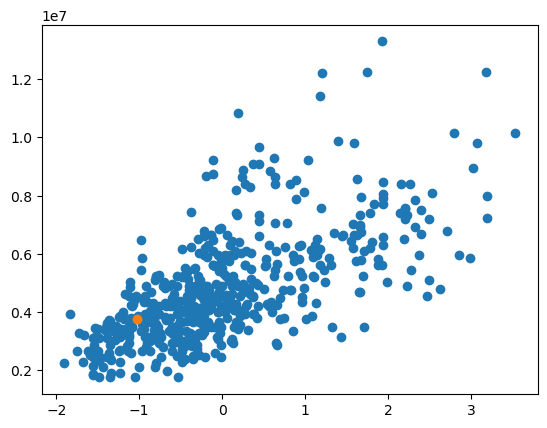

In [30]:
pca = PCA(n_components=1)
component = pca.fit_transform(X).squeeze()
predcited_pca = pca.transform(givenData).squeeze()

plt.scatter(component, y)
plt.scatter(predcited_pca, predicted_price)

In [2]:
def test(x = ...): 
    print(x)

test(x = 2)

2


In [3]:
x = [1, 2, ..., 4]
x

[1, 2, Ellipsis, 4]